In [ ]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [75]:
d = '../data'

In [85]:
f = open(os.path.join(d, 'test_1.txt'))
line = f.readline()
f.close()
j
img_path, label_path = line.split('\t')
label_path = label_path.strip()

img_path = '../data/floorplan_image/train/0668.jpg'
label_path = '../data/floorplan_representation/train/0668.txt' 

img_path = '../data/floorplan_image/test/0040.jpg'
label_path = '../data/floorplan_representation/test/0040.txt' 

print(img_path, label_path)

../data/floorplan_image/test/0040.jpg ../data/floorplan_representation/test/0040.txt


In [86]:
def draw_label(img):
    with open(label_path) as f:
        f = f.readlines()
    for l in f:
        l = l.split('\t')
        p0, p1, s = (int(l[0]), int(l[1])), (int(l[2]), int(l[3])), l[4]
        if s != 'wall':
            continue
        #print(l)
        for p in [p0, p1]:
            img = cv2.circle(img, p, 1, (255, 0, 0), 5)
    return img

def draw_ps(img, ps):
    for p in ps:
        if len(p) > 2:
            p = tuple(map(int, p[:2]))
        img = cv2.circle(img, p, 1, (255, 0, 0), 5)
    return img

def draw_ps2(img, ps):
    print('total points: %d' % len(ps))
    for p in ps:
        img = cv2.circle(img, (int(p[0]), int(p[1])), 1, (255, 0, 0), 5)
    return img

def draw_recs(recs):
    img = np.zeros((256, 256), dtype=int)
    for r in recs: img = cv2.rectangle(img, r[0], r[1], (0,255,0), 3)
    return img

def draw_lines(img, lines):
    #for d, l in zip(ds, lines):
    for l in lines:
        #print(d, l[0], l[1])
        colors = [(255,0,0), (0,255,0), (0,0,255)]
        img = cv2.line(img, tuple(map(int, l[0])), tuple(map(int, l[1])), colors[1], 5)
    return img

def draw_pred(img):
    f = open(os.path.join(d, 'test_res.txt'))
    l = f.readline()
    f.close()
    l = l.split('), (')
    for i, e in enumerate(l):
        if i==0:
            e += ')'
        elif i==len(l)-1:
            e = '(' + e.strip()
        else:
            e = '(' + e + ')'
        x = e.index(')')
        h, v = e[2:x].split(',')
        h, v = int(h.strip()), int(v.strip())
        #print(e, h, v)
        img = cv2.circle(img, (h, v), 1, (0, 255, 0), 5)
    return img

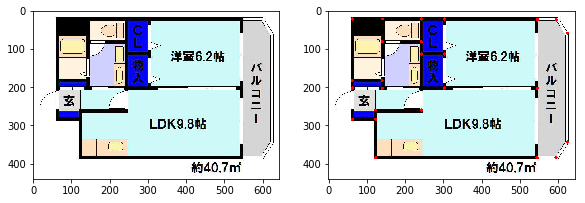

In [87]:
img = cv2.imread(os.path.join(d, img_path))
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(draw_label(img))

#plt.subplot(133)
#plt.imshow(draw_pred(img))

plt.show()

In [79]:
ps2 = [[97.49090909090908, 104.74545454545455, 1, 0], [50.27777777777778, 153.77777777777777, 1, 0], [24.92, 10.5, 1, 1], [26.818181818181817, 10.818181818181818, 1, 2], [25.789473684210527, 113.52631578947368, 1, 3], [244.3, 138.9, 1, 5], [236.07142857142858, 10.642857142857142, 1, 6], [235.3170731707317, 150.609756097561, 1, 10], [249.07142857142858, 27.285714285714285, 1, 11], [58.08695652173913, 31.08695652173913, 2, 0], [97.11494252873563, 45.93103448275862, 2, 0], [25.738095238095237, 73.57142857142857, 2, 0], [56.721311475409834, 81.0, 2, 1], [121.12698412698413, 80.88888888888889, 2, 1], [217.29310344827587, 151.86206896551724, 2, 1], [25.833333333333332, 26.555555555555557, 2, 2], [97.09803921568627, 35.294117647058826, 2, 2], [121.50909090909092, 45.07272727272727, 2, 2], [58.42857142857143, 74.0, 2, 2], [216.1375, 79.9375, 2, 2], [49.275, 113.525, 2, 2], [57.229166666666664, 10.0, 2, 3], [97.17543859649123, 10.017543859649123, 2, 3], [121.54166666666667, 9.75, 2, 3], [216.14, 9.6, 2, 3], [51.0, 106.22222222222223, 2, 3], [96.98275862068965, 80.82758620689656, 3, 0]]
len(ps2)

27

total points: 27


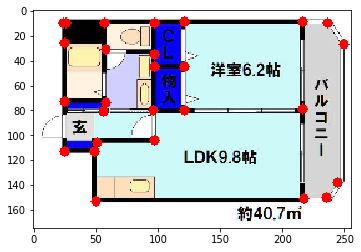

In [80]:
img = cv2.imread(img_path)
img = cv2.resize(img, (256, 175))
img = draw_ps2(img, ps2)
plt.imshow(img)

(244.28571428571428, 138.85714285714286)
total points: 1


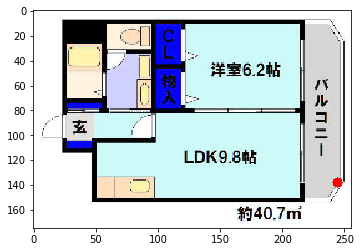

(248.95454545454547, 27.34090909090909)
total points: 1


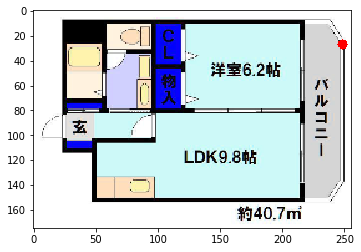

In [59]:
for p in ps2:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256, 175))
    print(p)
    img = draw_ps2(img, [p])
    plt.imshow(img)
    plt.show()

540
total points: 27


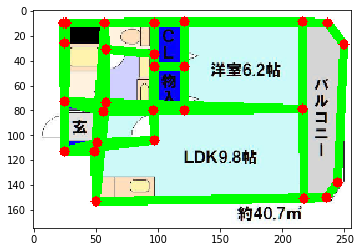

In [81]:
dd =
print(len(dd))
img = cv2.imread(img_path)
img = cv2.resize(img, (256, 175))
img = draw_lines(img, dd)
img = draw_ps2(img, ps2)
plt.imshow(img)

In [ ]:
from skimage.draw import polygon
img = np.zeros((10, 10), dtype=np.uint8)
r = np.array([1, 2, 8])
c = np.array([1, 7, 4])
rr, cc = polygon(r, c)
img[rr, cc] = 1
img